In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Prepare the features (X) and target variable (y)
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Extract TP, FP, TN, FN from the confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute error rate
error_rate = 1 - accuracy

# Compute precision
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

# Compute F1-score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[50  2]
 [ 9 19]]
Accuracy: 0.8625
Error Rate: 0.13749999999999996
Precision: 0.9047619047619048
Recall: 0.6785714285714286
F1-score: 0.7755102040816326


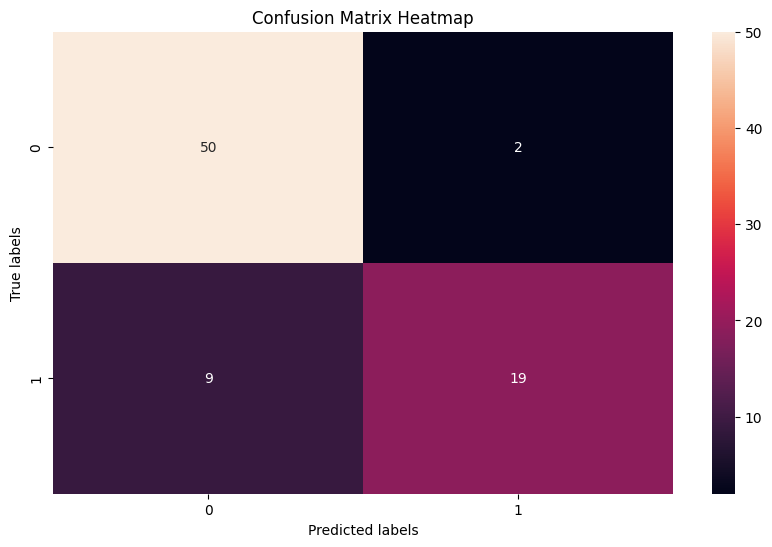

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Using seaborn to create the heatmap
plt.figure(figsize=(10, 6))  # Optional: adjusts the size of the plot
with sns.color_palette("rocket"):
    sns.heatmap(conf_matrix, annot=True, cbar=True)

# Adding labels and title for clarity
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
